### Imports

In [2]:
from main import QuantumIR
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit
import numpy as np


IR:

builtin.module {
  "quantum.func"() ({
  ^0(%q0_0 : i1, %q1_0 : i1, %q2_0 : i1):
    %q3_0 = "quantum.init"() {"type" = i1, "value" = false} : () -> i1
    %q3_1 = "quantum.cnot"(%q0_0, %q3_0) : (i1, i1) -> i1
    %q3_2 = "quantum.cnot"(%q1_0, %q3_1) : (i1, i1) -> i1
    %q3_3 = "quantum.cnot"(%q2_0, %q3_2) : (i1, i1) -> i1
    %q4_0 = "quantum.init"() {"type" = i1, "value" = false} : () -> i1
    %q5_0 = "quantum.init"() {"type" = i1, "value" = false} : () -> i1
    %q6_0 = "quantum.init"() {"type" = i1, "value" = false} : () -> i1
    %q6_1 = "quantum.ccnot"(%q0_0, %q1_0, %q6_0) : (i1, i1, i1) -> i1
    %q6_2 = "quantum.not"(%q6_1) : (i1) -> i1
    %q7_0 = "quantum.init"() {"type" = i1, "value" = false} : () -> i1
    %q7_1 = "quantum.ccnot"(%q1_0, %q2_0, %q7_0) : (i1, i1, i1) -> i1
    %q7_2 = "quantum.not"(%q7_1) : (i1) -> i1
    %q5_1 = "quantum.ccnot"(%q6_2, %q7_2, %q5_0) : (i1, i1, i1) -> i1
    %q6_3 = "quantum.not"(%q6_2) : (i1) -> i1
    %q7_3 = "quantum.not"(%q7_2) : (

### Generate the IR

In [17]:
# Run
quantum_ir = QuantumIR()
quantum_ir.run_dataclass()
quantum_ir.run_generate_ir()
quantum_ir.run_transformations()


IR:

builtin.module {
  "quantum.func"() ({
  ^0(%q0_0 : i1, %q1_0 : i1, %q2_0 : i1):
    %q3_0 = "quantum.init"() {"type" = i1, "value" = false} : () -> i1
    %q3_1 = "quantum.cnot"(%q0_0, %q3_0) : (i1, i1) -> i1
    %q3_2 = "quantum.cnot"(%q1_0, %q3_1) : (i1, i1) -> i1
    %q3_3 = "quantum.cnot"(%q2_0, %q3_2) : (i1, i1) -> i1
    %q4_0 = "quantum.init"() {"type" = i1, "value" = false} : () -> i1
    %q5_0 = "quantum.init"() {"type" = i1, "value" = false} : () -> i1
    %q6_0 = "quantum.init"() {"type" = i1, "value" = false} : () -> i1
    %q6_1 = "quantum.ccnot"(%q0_0, %q1_0, %q6_0) : (i1, i1, i1) -> i1
    %q6_2 = "quantum.not"(%q6_1) : (i1) -> i1
    %q7_0 = "quantum.init"() {"type" = i1, "value" = false} : () -> i1
    %q7_1 = "quantum.ccnot"(%q1_0, %q2_0, %q7_0) : (i1, i1, i1) -> i1
    %q7_2 = "quantum.not"(%q7_1) : (i1) -> i1
    %q5_1 = "quantum.ccnot"(%q6_2, %q7_2, %q5_0) : (i1, i1, i1) -> i1
    %q6_3 = "quantum.not"(%q6_2) : (i1) -> i1
    %q7_3 = "quantum.not"(%q7_2) : (

### Transform CCNOT gates

In [18]:
quantum_ir.metrics_transformation()
quantum_ir.run_transformations()



CCNOT decomposition:

builtin.module {
  "quantum.func"() ({
  ^0(%q0_0 : i1, %q1_0 : i1, %q2_0 : i1):
    %q3_0 = "quantum.init"() {"type" = i1, "value" = false} : () -> i1
    %q3_1 = "quantum.cnot"(%q0_0, %q3_0) : (i1, i1) -> i1
    %q3_2 = "quantum.cnot"(%q1_0, %q3_1) : (i1, i1) -> i1
    %q3_3 = "quantum.cnot"(%q2_0, %q3_2) : (i1, i1) -> i1
    %q4_0 = "quantum.init"() {"type" = i1, "value" = false} : () -> i1
    %q5_0 = "quantum.init"() {"type" = i1, "value" = false} : () -> i1
    %q6_0 = "quantum.init"() {"type" = i1, "value" = false} : () -> i1
    %q6_1 = "quantum.h"(%q6_0) : (i1) -> i1
    %q6_2 = "quantum.cnot"(%q1_0, %q6_1) : (i1, i1) -> i1
    %q6_3 = "quantum.tdagger"(%q6_2) : (i1) -> i1
    %q6_4 = "quantum.cnot"(%q0_0, %q6_3) : (i1, i1) -> i1
    %q6_5 = "quantum.t"(%q6_4) : (i1) -> i1
    %q6_6 = "quantum.cnot"(%q1_0, %q6_5) : (i1, i1) -> i1
    %q6_7 = "quantum.tdagger"(%q6_6) : (i1) -> i1
    %q6_8 = "quantum.cnot"(%q0_0, %q6_7) : (i1, i1) -> i1
    %q1_1 = "quan

### Find input and output number

In [19]:
module = quantum_ir.module
funcOp = module.body.block._first_op

# Numbers and type of the input parameters
input_args = funcOp.body.block._args
input_number = input_args.__len__()
input_types = [arg.type for arg in input_args]

# First and last op
first_op = funcOp.body.block._first_op
last_op = funcOp.body.block._last_op
output_number = 0

qubit_number=input_number
current = first_op
while(current is not None):
    if current.name == "quantum.init":
        qubit_number += 1
    if current.name == "quantum.measure":
        output_number += 1
    current = current.next_op

print("Number of inputs: ", input_number,"Total qubit used: ",qubit_number, "Number of outputs: ", output_number)

Number of inputs:  3 Total qubit used:  9 Number of outputs:  2


### Initialize circuit

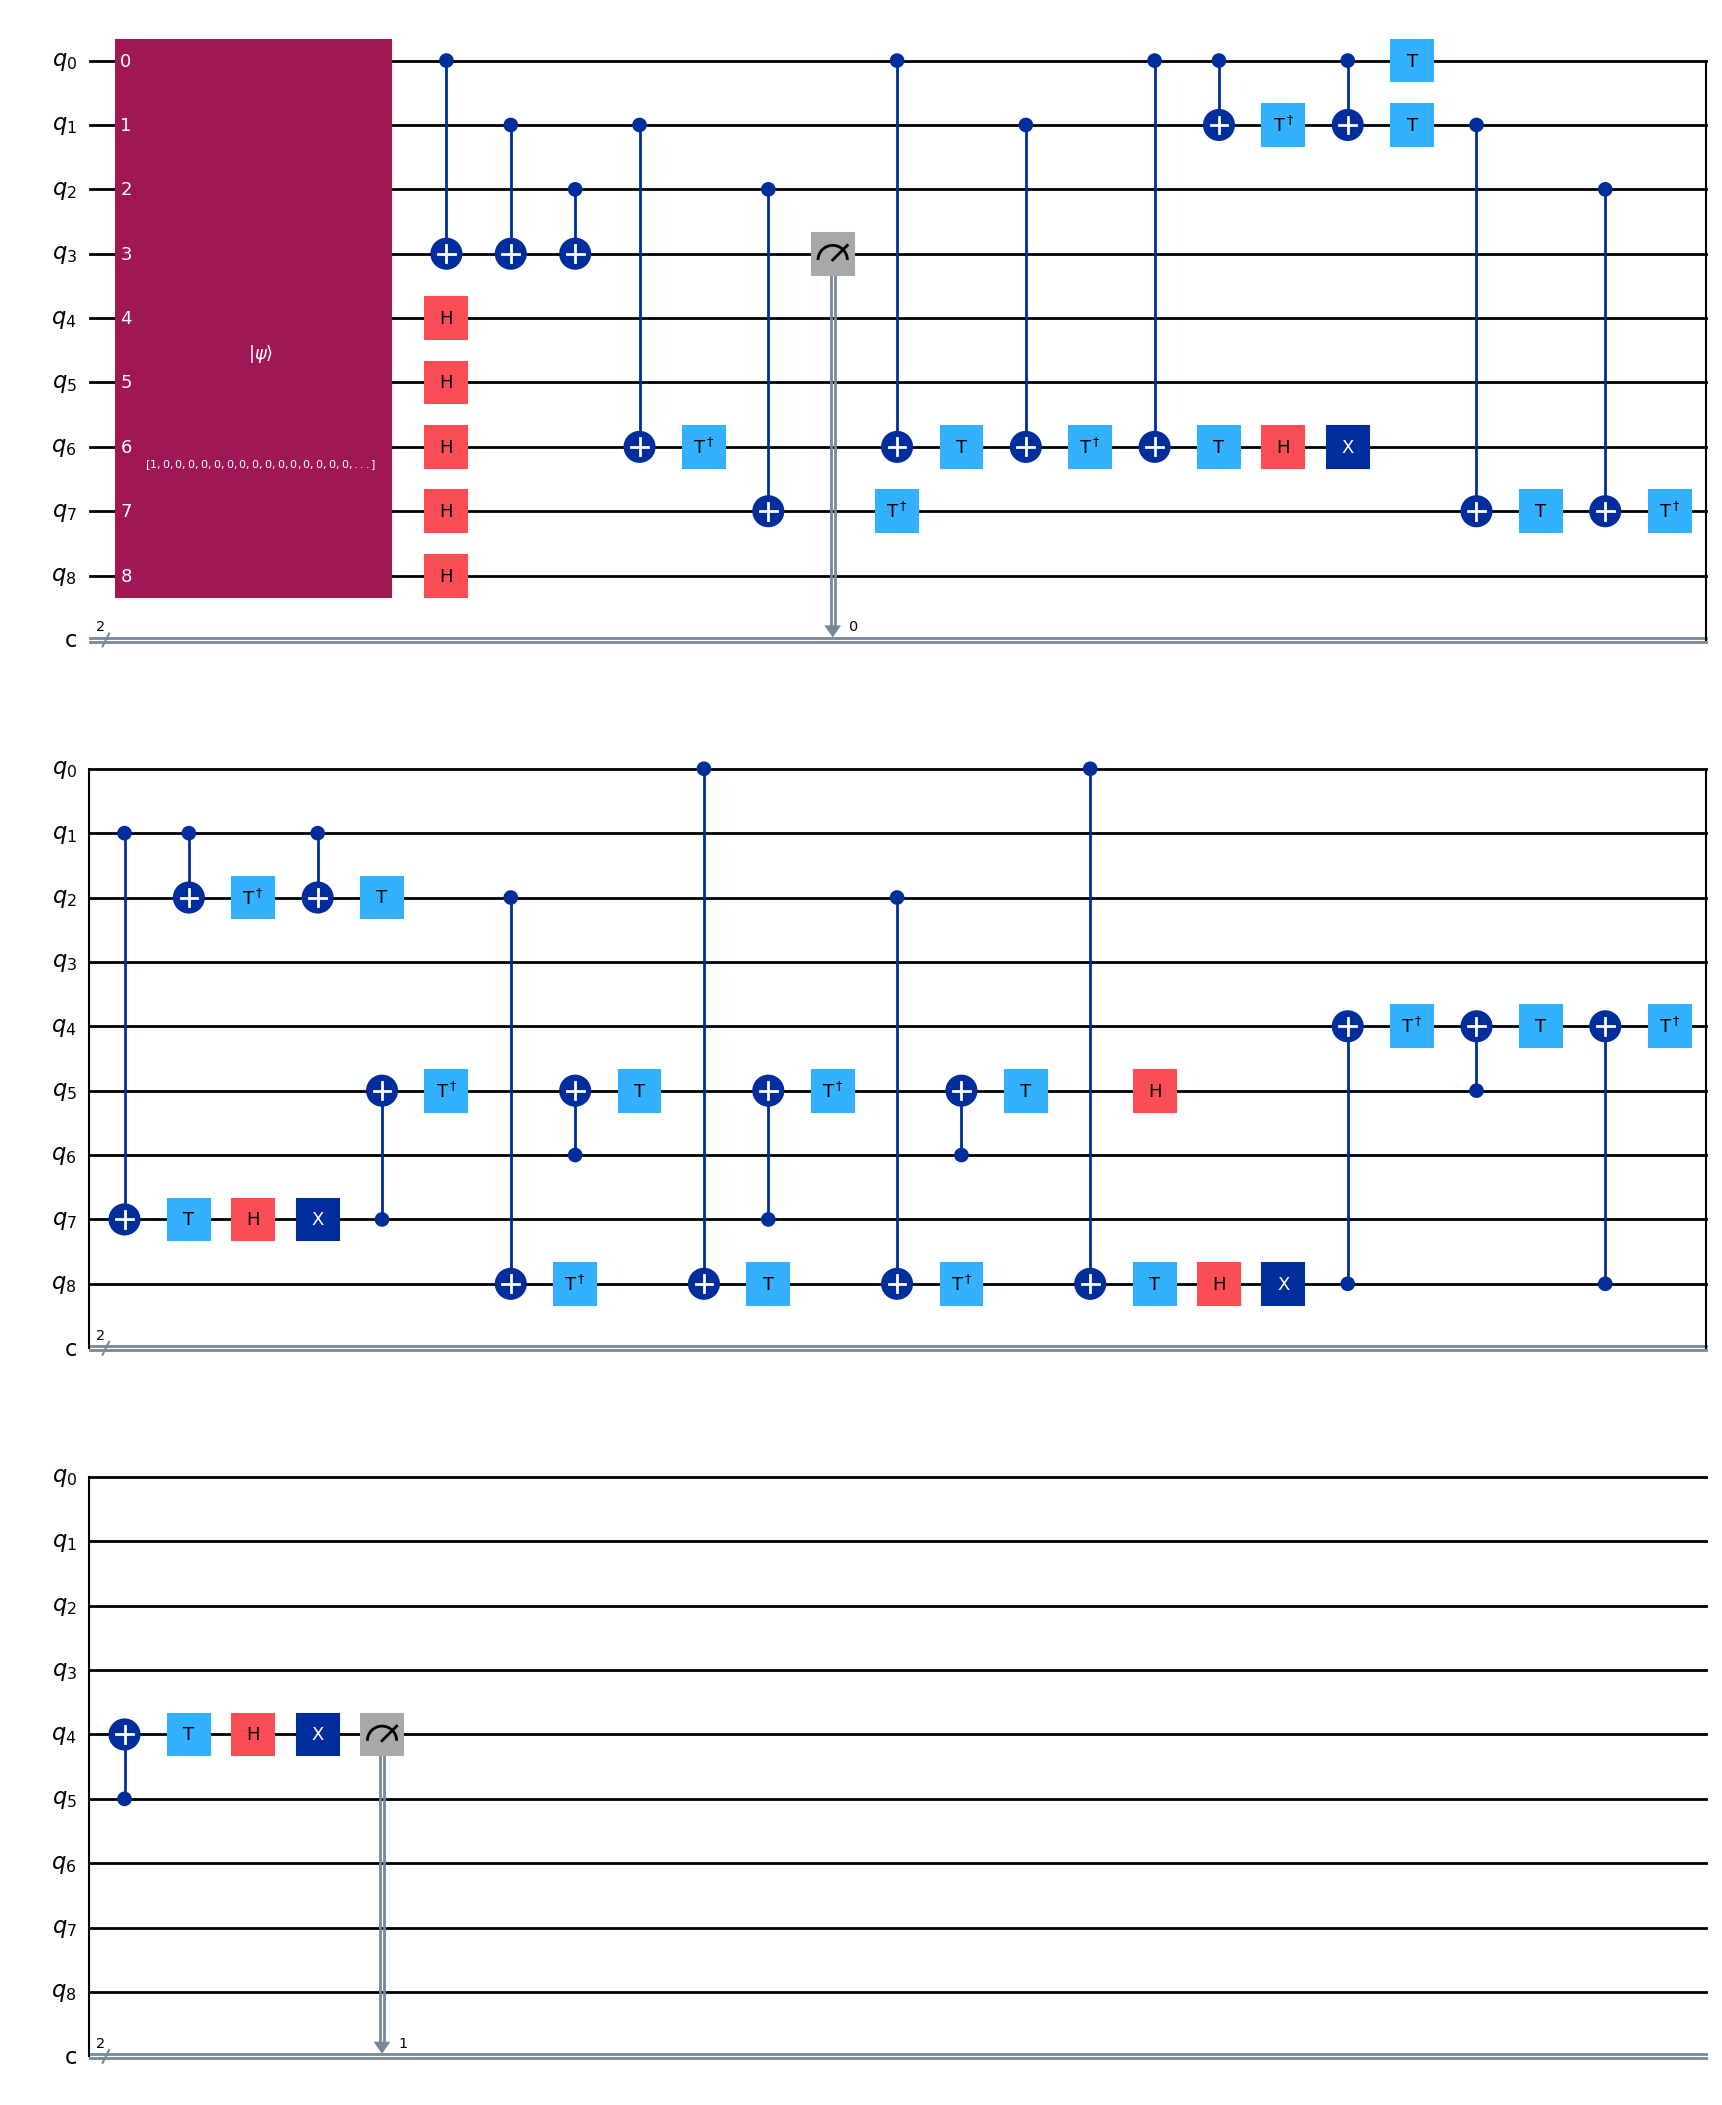

In [20]:

def create_circuit(first_op, input_number, output_number, state):

    circuit = QuantumCircuit(input_number, output_number)
    current = first_op
    cbit_index = 0

    qubit_list = [i for i in range(input_number)]

    circuit.initialize(state, qubit_list)

    while(current is not None):
        # find the indexes of the qubit
        operands_names = [op._name for op in current.operands]
        indexes = [int(name.split("_")[0][1]) for name in operands_names]
        if current.name == "quantum.not":
            circuit.x(indexes[0])
        if current.name  == "quantum.cnot":
            circuit.cx(indexes[0], indexes[1])
        if current.name == "quantum.ccnot":
            circuit.ccx(indexes[0], indexes[1], indexes[2])
        if current.name == "quantum.h":
            circuit.h(indexes[0])
        if current.name == "quantum.t":
            circuit.t(indexes[0])
        if current.name == "quantum.tdagger":
            circuit.tdg(indexes[0])
        if current.name == "quantum.measure":
            circuit.measure(indexes[0], cbit_index)
            cbit_index += 1
        
        current = current.next_op
    
    return circuit

# initializing it to an example state (e.g. all qubit at 0)
example_state = np.array([1] + [0] * (2**qubit_number - 1))
create_circuit(first_op, qubit_number, output_number,example_state).draw(output='mpl')



### Truth tables

In [21]:
from numpy import eye

istates = eye(2**qubit_number)

def bit_strings_iterative(N):
    bit_list = ['']
    for _ in range(N):
        bit_list = ['0' + bit_string for bit_string in bit_list] + \
                   ['1' + bit_string for bit_string in bit_list]
    return bit_list

# tutte le stringhe di bit di qubit_number bit
istr = bit_strings_iterative(qubit_number)

print(istr)
print(istates)

['000000000', '000000001', '000000010', '000000011', '000000100', '000000101', '000000110', '000000111', '000001000', '000001001', '000001010', '000001011', '000001100', '000001101', '000001110', '000001111', '000010000', '000010001', '000010010', '000010011', '000010100', '000010101', '000010110', '000010111', '000011000', '000011001', '000011010', '000011011', '000011100', '000011101', '000011110', '000011111', '000100000', '000100001', '000100010', '000100011', '000100100', '000100101', '000100110', '000100111', '000101000', '000101001', '000101010', '000101011', '000101100', '000101101', '000101110', '000101111', '000110000', '000110001', '000110010', '000110011', '000110100', '000110101', '000110110', '000110111', '000111000', '000111001', '000111010', '000111011', '000111100', '000111101', '000111110', '000111111', '001000000', '001000001', '001000010', '001000011', '001000100', '001000101', '001000110', '001000111', '001001000', '001001001', '001001010', '001001011', '001001100'

In [22]:
from qiskit.providers import JobStatus

counts = {}
quantum_truth_table = {}
backend = AerSimulator()
qubit_list = [i for i in range(qubit_number)]
# cycling only on the states combination of qubits for the real inputs, IGNORING SUPPORT
for i in range(2**input_number):
    circuit = create_circuit(first_op, qubit_number, output_number, istates[i])

    job = backend.run(circuit, shots=2000)
    result = job.result()

    quantum_truth_table[istr[i][qubit_number-input_number:]] = result.get_counts()

print(quantum_truth_table)


{'000': {'00': 2000}, '001': {'01': 2000}, '010': {'01': 2000}, '011': {'10': 2000}, '100': {'01': 2000}, '101': {'10': 2000}, '110': {'10': 2000}, '111': {'11': 2000}}


Notice that, both for input and output qubits, the q[0] is the rightmost one (little endian).

In [84]:
import csv

# Initialize the dictionary
classical_truth_table = {}

# Read the CSV file
with open('truth-tables/xorInPlace.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    
    # Dynamically find "out" columns
    out_columns = [col for col in csv_reader.fieldnames if col.startswith('out')]
    
    for row in csv_reader:
        # Extract the values of "out" columns, reverse them, and join as a string
        flipped_value = ''.join(str(row[col]) for col in reversed(out_columns))
        classical_truth_table[row['Inputs']] = flipped_value

print(classical_truth_table)

{'0000': '00', '0001': '01', '0010': '00', '0011': '01', '0100': '00', '0101': '11', '0110': '10', '0111': '01', '1000': '00', '1001': '01', '1010': '00', '1011': '01', '1100': '01', '1101': '10', '1110': '11', '1111': '00'}


In [85]:
equal = quantum_truth_table == classical_truth_table

# Print the result
print("Are the truth tables equal?", equal)

if not equal:
    for key in quantum_truth_table:
        if quantum_truth_table[key] != classical_truth_table.get(key):
            print(f"Difference found at key {key}: new_counts has {quantum_truth_table[key]}, data_dict has {classical_truth_table.get(key)}")

Are the truth tables equal? True


# Metriche
Circuit depth, circuit width (only number of qubits, qiskit counts also classical bits), gate count, t gate count, t gate depth.

In [23]:
print("Depth of the quantum circuit:", circuit.depth())
print("Number of qubits in the quantum circuit:", circuit.num_qubits)
print("Number of gates in the quantum circuit:", circuit.size())

print("T gate count for the circuit ",circuit.count_ops()['t'] + circuit.count_ops()['tdg'])
print("T gate depth: ", circuit.depth(lambda gate: gate.operation.name in ['t', 'tdg']))

Depth of the quantum circuit: 44
Number of qubits in the quantum circuit: 9
Number of gates in the quantum circuit: 69
T gate count for the circuit  25
T gate depth:  17


T Gate Depth: 20
T Gate Width: 1


/tmp/ipykernel_975/2066871084.py:11: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  for i, (operation, qubits, _) in enumerate(circuit.data):


In [85]:
from qiskit.converters import circuit_to_dag
from qiskit.dagcircuit.dagcircuit import DAGOpNode

# Step 1: Convert to a DAGCircuit
dag = circuit_to_dag(circuit)
tgatewidth=0
# Step 2: Retrieve the critical path
# Each element in the critical path is a node in the DAG that contributes to this longest path
critical_path = dag.longest_path()
print("Critical Path:")
for node in critical_path:
    if isinstance(node, DAGOpNode): 
        qubit_indices = [circuit.qubits.index(q) for q in node.qargs] 
        #print(f"{node.name} {tuple(qubit_indices)}")
        if(node.name=="tdg" or node.name=="t"):
            tgatewidth+=1
print("Critical Path Length:", len(critical_path))
print("T Gate Width:", tgatewidth)

Critical Path:
Critical Path Length: 46
T Gate Width: 17
